In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,OrdinalEncoder
from xverse.transformer import WOE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,8]

* Describing Original Data

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [14]:
df.shape

(69713, 22)

* Data has 69713 rows and 22 columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

* We need to change DOB data type to datetime and further extract information from it.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employer_Category2,65415.0,3.720187,0.807374,1.00,4.00,4.0,4.0,4.0
Monthly_Income,69713.0,5622.283200,174767.061840,0.00,1650.00,2500.0,4000.0,38383838.3
Existing_EMI,69662.0,360.928751,2288.517927,0.00,0.00,0.0,350.0,545436.5
Loan_Amount,42004.0,39429.982859,30727.595990,5000.00,20000.00,30000.0,50000.0,300000.0
Loan_Period,42004.0,3.890629,1.167491,1.00,3.00,4.0,5.0,6.0
Interest_Rate,22276.0,19.213570,5.847136,11.99,15.25,18.0,20.0,37.0
EMI,22276.0,1101.466242,752.661394,118.00,649.00,941.0,1295.0,13556.0
Var1,69713.0,3.948446,3.819214,0.00,0.00,2.0,7.0,10.0
Approved,69713.0,0.014631,0.120073,0.00,0.00,0.0,0.0,1.0


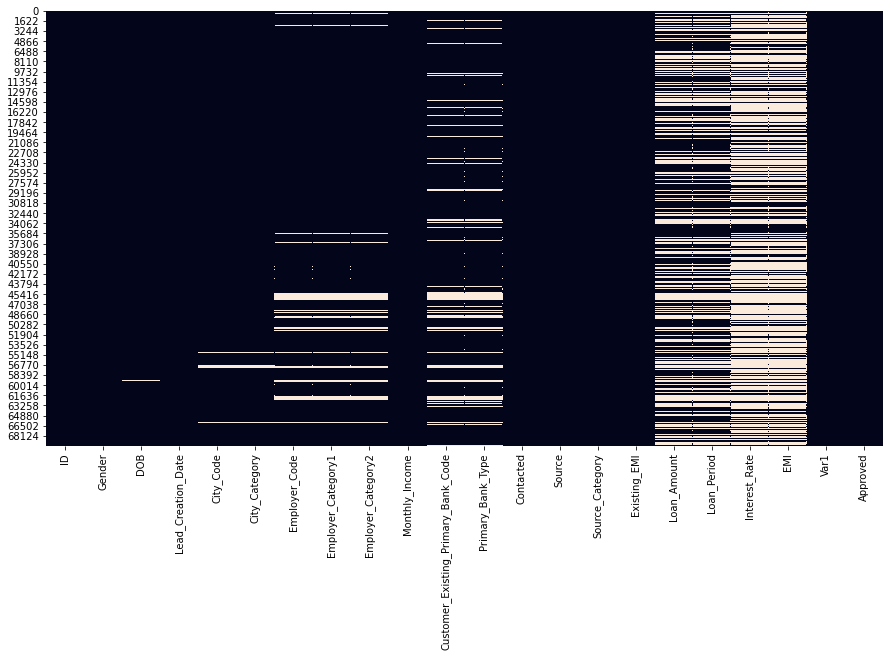

In [17]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [18]:
pd.DataFrame({'Null':df.isnull().sum(),'Null_percent':df.isnull().sum()/df.shape[0]})

,Null,Null_percent
ID,0,0.000000
Gender,0,0.000000
DOB,15,0.000215
Lead_Creation_Date,0,0.000000
City_Code,814,0.011676
City_Category,814,0.011676
Employer_Code,4018,0.057636
Employer_Category1,4018,0.057636
Employer_Category2,4298,0.061653
Monthly_Income,0,0.000000


* Most of our null values exist in Interest Rate, EMI, Loan Amount and Loan Period


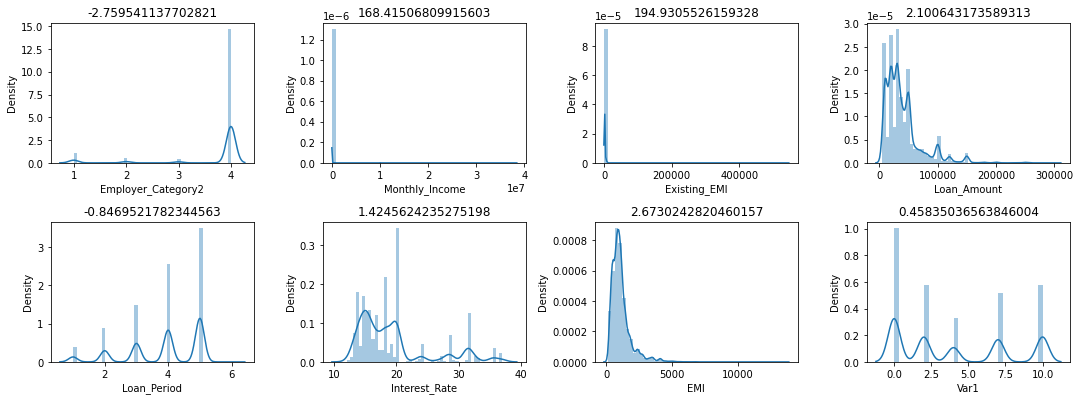

In [19]:
j=1
for i in df.drop('Approved',axis=1).select_dtypes(include=np.number):
    plt.subplot(3,4,j)
    plt.title(df[i].skew())
    sns.distplot(df[i])
    j=j+1
plt.tight_layout()
plt.show()

## Inferences for numerical data


   * -------------------------------------------------------------------------------------------------------------------- *

 #### Monthly Income
* It is highly right skewed.
* It might be because of few very high income leads.
 #### Employer_Category2
* Most of the leads seem to be in category:4 , followed by category:1.
 #### Existing EMI
* It is highly right skewed.
* Most of the leads don't have any existing Emis.
 #### Interest Rate
* It is right skewed.
* Most of the leads are to be offered interest rate between approx 10%-25% per annum.
* It is having a range from 10%-40% per annum (*approx).
 #### EMI
* It is right skewed.
* Most of the leads are to be offered EMI below 5000 Dollars.
 #### Loan Period
* Most of the leads have requested for a repayment tenure of 5 years followed by 4 years.
* Other Repayment tenures are for 1 , 2 , 3 years respectively according to the increasing density of leads.
 #### Var1
* This seems to be an anonymous rating given to the leads by the bank.
* Most of the leads are given a rating of 0.
 #### Loan Amount
* It is highly positively/right skewed.
* The loan amount requested by most of the leads is less than 100,000 dollars.





In [20]:
df_cat=df.drop(['ID','DOB','City_Code','Employer_Code','Customer_Existing_Primary_Bank_Code','Source','Lead_Creation_Date'],axis=1).select_dtypes(include=object)

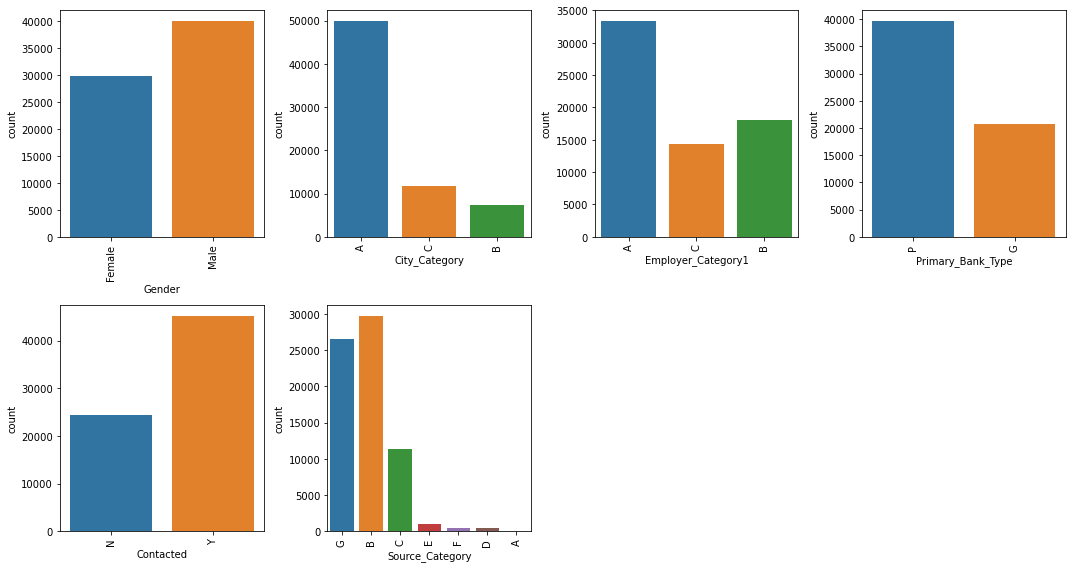

In [21]:
i = 1
for x in df_cat.columns:
    plt.subplot(2, 4, i)
    sns.countplot(df[x])
    plt.xticks(rotation=90)
    i += 1
plt.tight_layout()


## Inferences for categorical data


* -------------------------------------------------------------------------------------------------------------------- *  
#### Gender
* More than 50% of the leads are Males.
#### City Category
* Most of the leads fall in city category:A followed by C.
#### Employer Category 1
* Most of the leads have employer category as A followed by B.
#### Primary Bank Type
* As per our understanding the two categories (P and G) can be interpreted as PRIVATE and GOVERNMENT
* Approx more than 60% of the leads are having their primary bank type as PRIVATE.
#### Contacted
* Approx more than 55% of the leads have been contacted by the bank.
#### Source Category
* Most of the leads are in source category B, G, C respectively as per increasing density of leads.


0    68693
1     1020
Name: Approved, dtype: int64


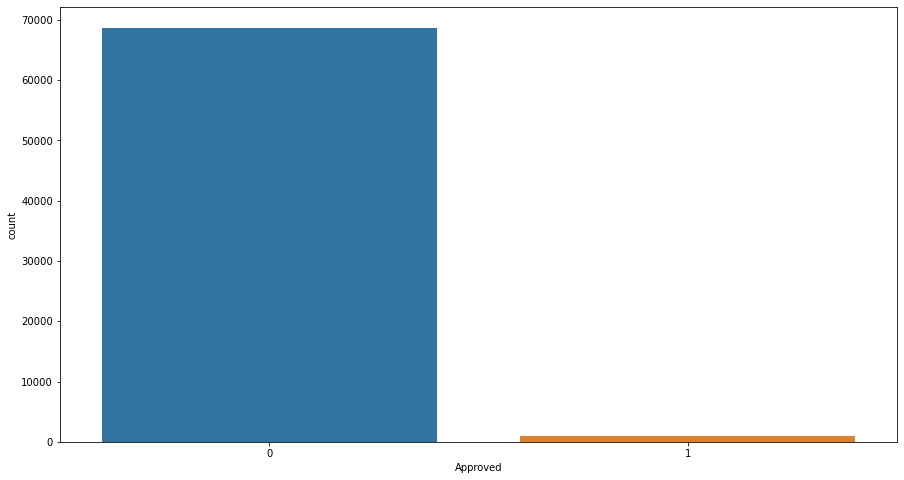

In [22]:
sns.countplot(df.Approved)
print(df.Approved.value_counts())
plt.show()

#### Approved
* The target variable is highly imbalanced

# Trying to identify patterns in the data (if any)

<AxesSubplot:>

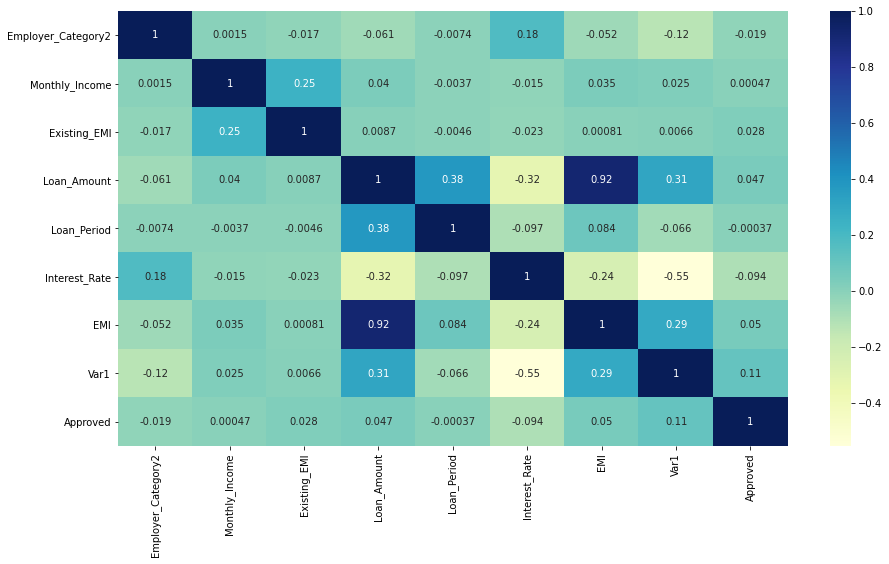

In [87]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

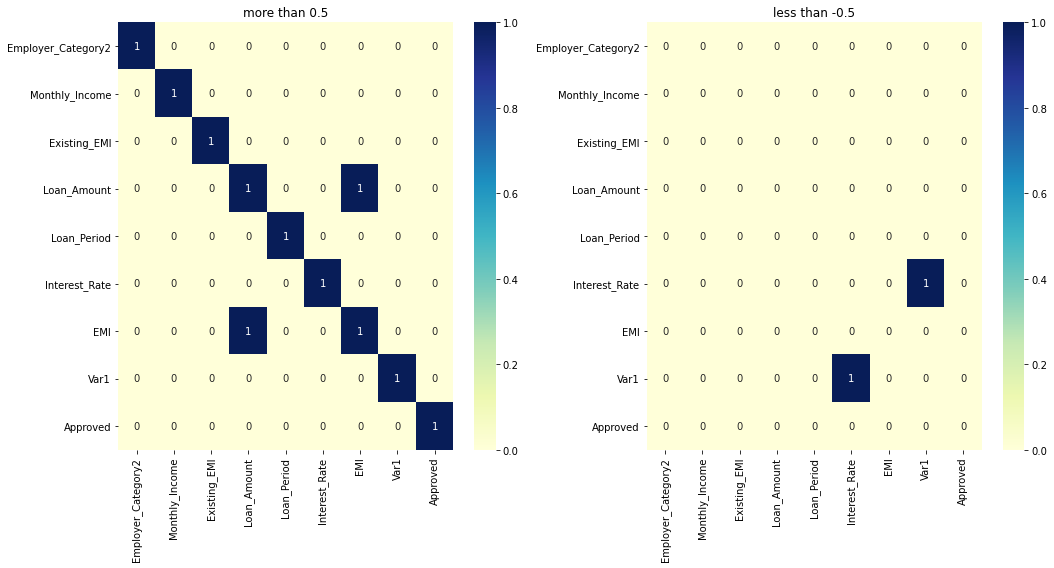

In [90]:
plt.subplot(1,2,1)
plt.title('more than 0.5')
sns.heatmap(df.corr()>0.5,annot=True,cmap='YlGnBu')
plt.subplot(1,2,2)
plt.title('less than -0.5')
sns.heatmap(df.corr()<(-0.5),annot=True,cmap='YlGnBu')
plt.tight_layout()
plt.show()

* Emi and loan amount have  strong positive correlation 
* var1 and interest rate have negative correlation

In [23]:
city=pd.DataFrame(df.groupby(['City_Category','City_Code'])['ID'].count()).reset_index()

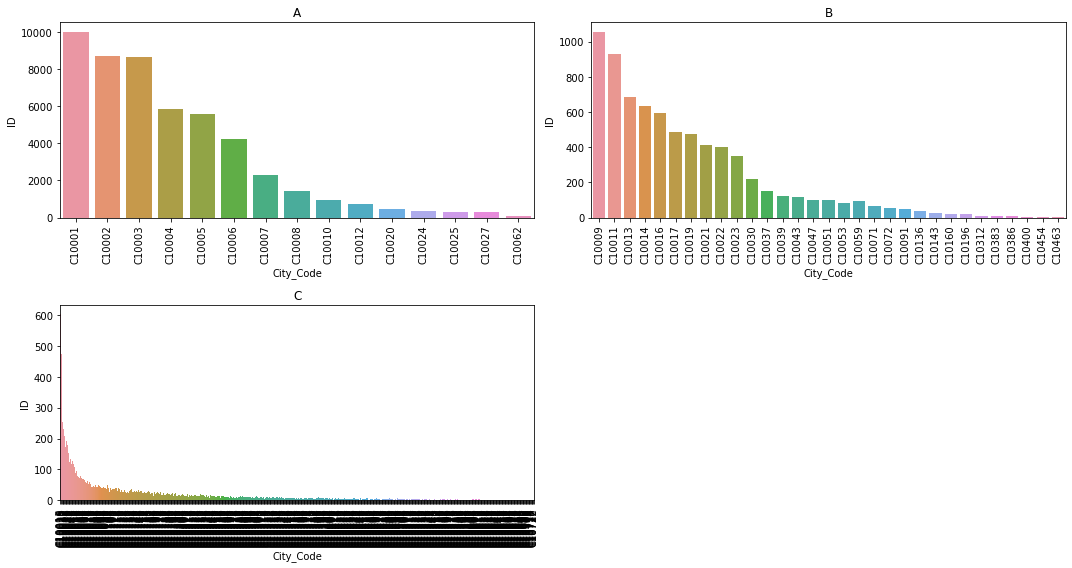

In [24]:
j=1
for i in city.City_Category.unique():
    plt.subplot(2,2,j)    
    plt.title(i)
    sns.barplot(data=city[city.City_Category==i],x='City_Code',y='ID')
    plt.xticks(rotation=90)
    j=j+1
plt.tight_layout()    
plt.show()

In [30]:
c_c=pd.DataFrame(df.groupby('City_Category')['City_Code'].nunique()).reset_index()

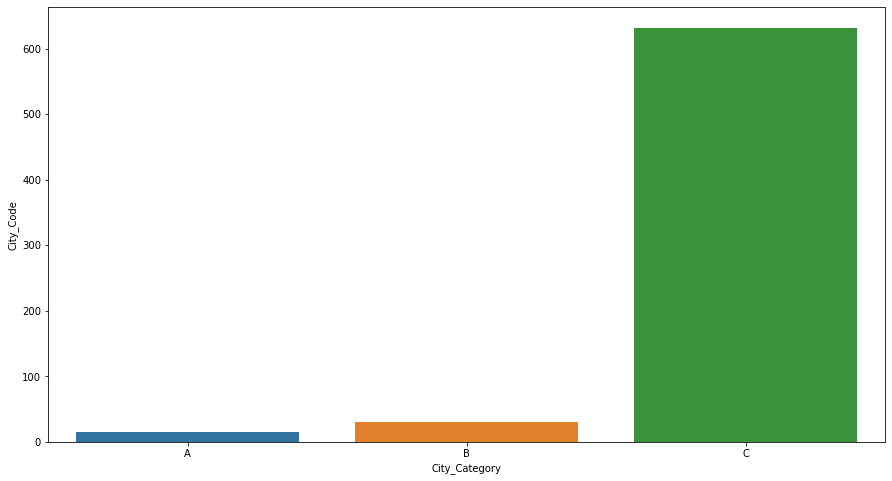

In [32]:
sns.barplot(data=c_c,x=c_c.City_Category,y=c_c.City_Code)
plt.show()

* As the numercal value of city codes(cities) is increaing the no. of leads are decreasing
* City_Category A has the highest no. of leads in our data.
* City_category : C has the maximum no. of cities followed by Category : B and the least in category : A

In [25]:
mi_city=pd.DataFrame(df.groupby(['City_Category'])['Monthly_Income'].median()).reset_index()
mi_city.head()

,City_Category,Monthly_Income
0,A,2500.0
1,B,2129.4
2,C,2100.0


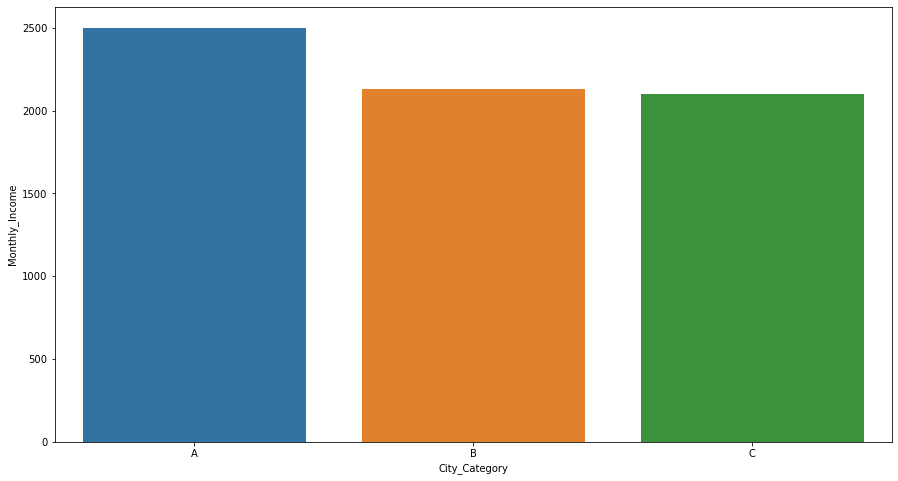

In [26]:
sns.barplot(x=mi_city.City_Category,y=mi_city.Monthly_Income)   
plt.show()

* It is observed that the income of leads from city_cat:A is more than income of leads from city_cat:B is more than city_cat:C.
* But the difference is not so significant , so we cannot demographically divide city cat on basis of income.

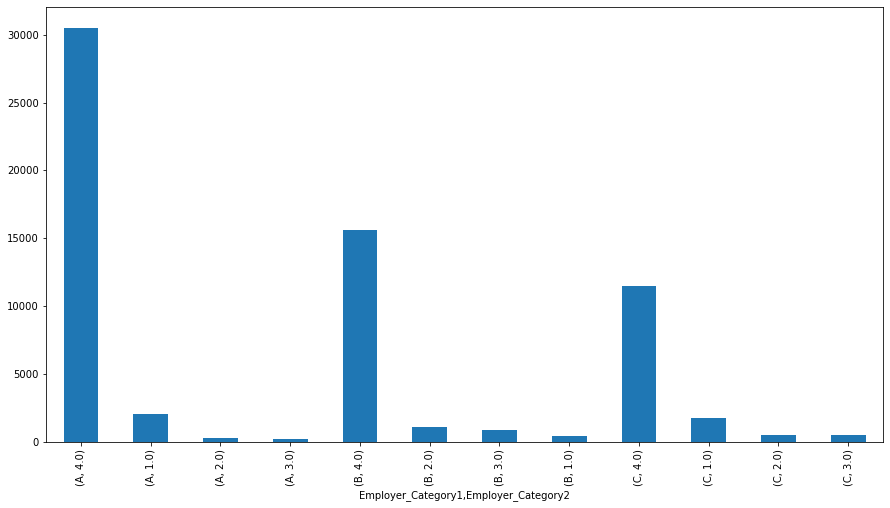

In [59]:
df.groupby('Employer_Category1')['Employer_Category2'].value_counts().plot(kind='bar')
plt.show()


* Employer category2 :4 has highest no. of leads across employer category:1
* Employer cat1 A>B>C considering no. of leads from them 

In [73]:
df.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')

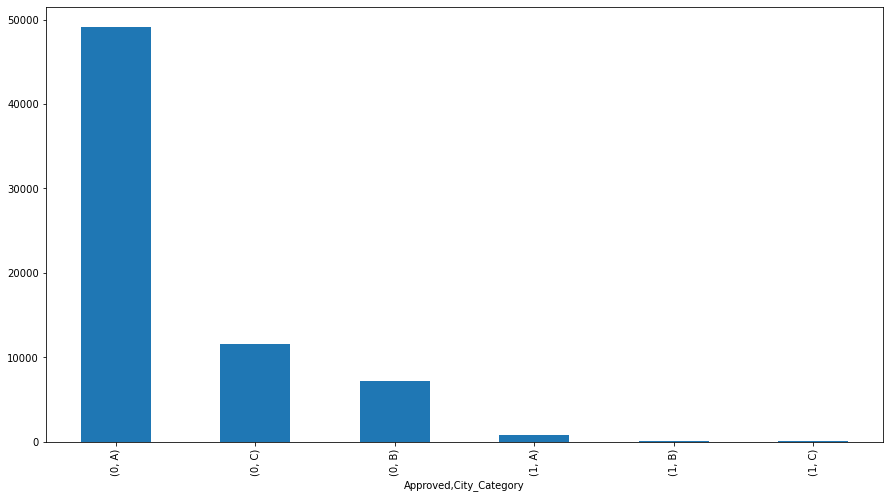

In [74]:
df.groupby('Approved')['City_Category'].value_counts().plot(kind='bar')
plt.show()


* Maximum approval of loan of Leads from City_cat A , this must be because of the density of the leads in the category 

# Data type correction

* Converting DOB and lead creating month to datetime format

In [91]:
df1 = df.copy()
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['Lead_Creation_Date'] = pd.to_datetime(df1['Lead_Creation_Date'])


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   69713 non-null  object        
 1   Gender                               69713 non-null  object        
 2   DOB                                  69698 non-null  datetime64[ns]
 3   Lead_Creation_Date                   69713 non-null  datetime64[ns]
 4   City_Code                            68899 non-null  object        
 5   City_Category                        68899 non-null  object        
 6   Employer_Code                        65695 non-null  object        
 7   Employer_Category1                   65695 non-null  object        
 8   Employer_Category2                   65415 non-null  float64       
 9   Monthly_Income                       69713 non-null  float64       
 10  Customer_E

In [93]:
num = df1.select_dtypes(include=np.number).columns
cat = df1.select_dtypes(include='object').columns
print("Numerical cols:", len(num), num, sep="\n")
print("Categorical cols:", len(cat), cat, sep="\n")


Numerical cols:
9
Index(['Employer_Category2', 'Monthly_Income', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')
Categorical cols:
11
Index(['ID', 'Gender', 'City_Code', 'City_Category', 'Employer_Code',
       'Employer_Category1', 'Customer_Existing_Primary_Bank_Code',
       'Primary_Bank_Type', 'Contacted', 'Source', 'Source_Category'],
      dtype='object')


* Now data has 9 numerical and 11 categorical features

# Checking for outliers and their treatment 

 Monthly Income

In [94]:
monthly_income_clipped=df1.Monthly_Income.clip(upper=df1.Monthly_Income.quantile(0.99))

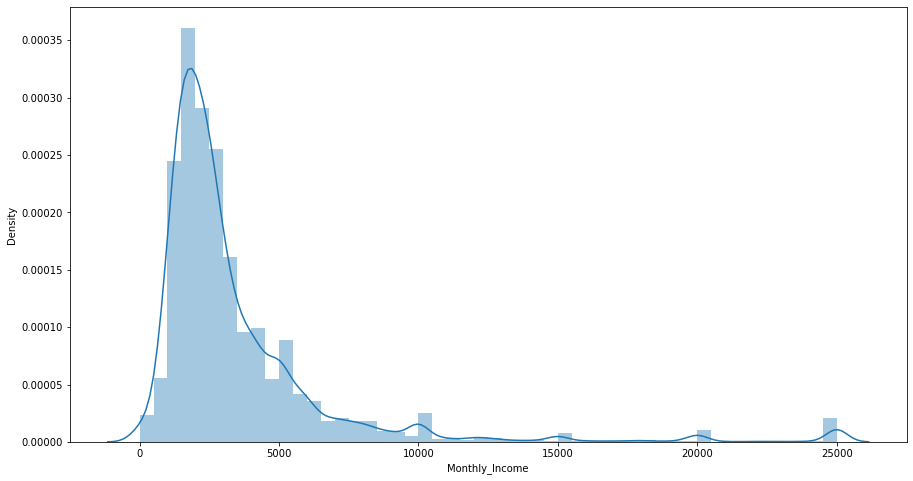

In [95]:
sns.distplot(monthly_income_clipped)
plt.show()

In [106]:
df[df.Monthly_Income>df.Monthly_Income.quantile(0.99)]['Approved'].value_counts()


0    622
1     12
Name: Approved, dtype: int64

# Null value imputation 
* using statistical tests, mode, median 

In [113]:
df1.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

ho- city cat and source cat are not related
ha- ho is not true

In [119]:
tbl = pd.crosstab(df1['City_Category'], df1['Source_Category'])
stats.chi2_contingency(tbl)


(1475.2909813252159,
 8.084269710528494e-309,
 12,
 array([[2.17209248e+00, 2.15848070e+04, 8.23512663e+03, 3.59843321e+02,
         7.60232369e+02, 3.32330150e+02, 1.86104884e+04],
        [3.18727413e-01, 3.16730054e+03, 1.20840186e+03, 5.28025080e+01,
         1.11554594e+02, 4.87652941e+01, 2.73085647e+03],
        [5.09180104e-01, 5.05989242e+03, 1.93047150e+03, 8.43541706e+01,
         1.78213036e+02, 7.79045559e+01, 4.36265513e+03]]))

* p-value <0.05 , so we reject h0 ,implies City_Category and Source_Category are related to each other

In [120]:
tbl

Source_Category,A,B,C,D,E,F,G
City_Category,,,,,,,
A,2,21148,8806,303,773,341,18512
B,0,2563,1796,44,92,83,2742
C,1,6101,772,150,185,35,4450


In [124]:
df1.loc[(df1.Source_Category == 'G') & (df1.City_Category.isna()), 'City_Category']='A'


* imputed none values in source category using mode

* ho - emp_cat and source_cat are not related
* ha- ho is not true

In [129]:
df2=df1.copy()

In [130]:
tbl = pd.crosstab(df2['Employer_Category1'], df2['Source_Category'])
stats.chi2_contingency(tbl), tbl


((151.83297537395342,
  2.4074505285129245e-26,
  12,
  array([[1.52230763e+00, 1.51068735e+04, 5.66653645e+03, 2.18197428e+02,
          5.31792800e+02, 2.29868453e+02, 1.15812090e+04],
         [8.24537636e-01, 8.18243665e+03, 3.06920393e+03, 1.18183728e+02,
          2.88038481e+02, 1.24505183e+02, 6.27280749e+03],
         [6.53154730e-01, 6.48168982e+03, 2.43125962e+03, 9.36188447e+01,
          2.28168719e+02, 9.86263643e+01, 4.96898347e+03]])),
 Source_Category     A      B     C    D    E    F      G
 Employer_Category1                                      
 A                   2  15404  5428  291  479  249  11483
 B                   1   8297  3017   64  303  114   6260
 C                   0   6070  2722   75  266   90   5080)

In [131]:
tbl

Source_Category,A,B,C,D,E,F,G
Employer_Category1,,,,,,,
A,2,15404,5428,291,479,249,11483
B,1,8297,3017,64,303,114,6260
C,0,6070,2722,75,266,90,5080


In [132]:
df2.loc[(df2.Source_Category=='F') & (df2.Employer_Category1.isna())]


,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
517,APPR20547696718,Female,1993-07-03,2016-02-07,C10029,C,NaN,NaN,NaN,133.3,...,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0
6103,APPB70673449948,Female,1987-08-31,2016-09-07,C10003,A,NaN,NaN,NaN,275.0,...,N,S122,F,0.0,NaN,NaN,NaN,NaN,0,0
6259,APPS20087734835,Female,1985-08-14,2016-10-07,C10028,C,NaN,NaN,NaN,250.0,...,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0
8003,APPS50767117236,Female,1988-08-15,2016-12-07,C10002,A,NaN,NaN,NaN,225.0,...,N,S133,F,0.0,NaN,NaN,NaN,NaN,0,0
9041,APPI50827547204,Female,1985-06-08,2016-07-14,C10001,A,NaN,NaN,NaN,166.7,...,N,S122,F,0.0,NaN,NaN,NaN,NaN,0,0
21071,APPX20618529942,Male,1993-09-12,2016-07-30,C10003,A,NaN,NaN,NaN,2500.0,...,Y,S122,F,0.0,NaN,NaN,NaN,NaN,0,0


In [133]:
df2['Employer_Category1'] = df2['Employer_Category1'].fillna('A')


* Imputation done on basis of mode

* ho - emp_cat1 and emp_cat2 are not related
* ha- ho is not true

In [135]:
tbl = pd.crosstab(df2['Employer_Category1'], df2['Employer_Category2'])
stats.chi2_contingency(tbl), tbl


((3620.8921746851556,
  0.0,
  6,
  array([[ 2151.68459833,   987.91530994,   818.63058931, 29097.76950241],
         [ 1175.30303447,   539.62363372,   447.15615684, 15893.91717496],
         [  931.01236719,   427.46105633,   354.21325384, 12590.31332263]])),
 Employer_Category2   1.0   2.0  3.0    4.0
 Employer_Category1                        
 A                   2069   291  196  30500
 B                    410  1113  921  15612
 C                   1779   551  503  11470)

In [136]:
tbl

Employer_Category2,1.0,2.0,3.0,4.0
Employer_Category1,,,,
A,2069,291,196,30500
B,410,1113,921,15612
C,1779,551,503,11470


In [137]:
df2['Employer_Category1'] = df2['Employer_Category1'].fillna('A')


In [139]:
df2['Employer_Category2'] = df2['Employer_Category2'].fillna(4)

* imputation done on basis of mode

* primary bank and city category

* ho - City_CategoryPrimary_Bank_Type andare not related
* ha- ho is not true

In [140]:
tbl = pd.crosstab(df2['City_Category'], df2['Primary_Bank_Type'])
stats.chi2_contingency(tbl), tbl

((3442.434162218691,
  0.0,
  2,
  array([[15329.04731275, 29334.95268725],
         [ 2147.10997646,  4108.89002354],
         [ 3226.84271079,  6175.15728921]])),
 Primary_Bank_Type      G      P
 City_Category                  
 A                  12365  32299
 B                   3070   3186
 C                   5268   4134)

In [142]:
tbl

Primary_Bank_Type,G,P
City_Category,,
A,12365,32299
B,3070,3186
C,5268,4134


In [141]:
df2.loc[(df2.City_Category=='A') & (df2.Primary_Bank_Type.isna())]

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
112,APPV20785952136,Female,1987-08-30,2016-01-07,C10005,A,COM0000265,B,4.0,1700.0,...,N,S133,B,0.0,NaN,NaN,NaN,NaN,0,0
113,APPX70088104309,Male,1987-08-30,2016-01-07,C10005,A,COM0000265,B,4.0,2000.0,...,Y,S133,B,0.0,10000.0,2.0,NaN,NaN,4,0
131,APPP90838484136,Female,1991-04-30,2016-01-07,C10001,A,COM0055473,B,4.0,1800.0,...,N,S133,B,600.0,NaN,NaN,NaN,NaN,0,0
164,APPC50368689037,Male,1975-12-13,2016-01-07,C10006,A,COM0033955,A,4.0,20000.0,...,Y,S133,E,600.0,20000.0,5.0,15.50,481.0,10,0
171,APPJ60753287728,Male,1975-12-13,2016-01-07,C10006,A,COM0033973,C,4.0,19850.0,...,Y,S122,E,600.0,20000.0,5.0,15.50,481.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69619,APPP50413694745,Female,1986-11-18,2016-09-30,C10003,A,COM0053171,A,4.0,1500.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
69630,APPC10432434003,Female,1987-12-05,2016-09-30,C10003,A,COM0033144,B,4.0,1500.0,...,N,S122,G,199.2,NaN,NaN,NaN,NaN,0,0
69637,APPM60551988006,Male,1979-07-18,2016-09-30,C10001,A,COM0020197,A,4.0,4000.0,...,Y,S122,G,0.0,85000.0,4.0,15.25,2376.0,10,0
69698,APPD90796759944,Male,1987-12-22,2016-09-30,C10001,A,COM0009891,A,4.0,3200.0,...,Y,S122,G,NaN,50000.0,5.0,NaN,NaN,0,0


In [143]:
df2.loc[(df2['City_Category'] == 'A') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'P'
df2.loc[(df2['City_Category'] == 'B') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'P'
df2.loc[(df2['City_Category'] == 'C') & (df2['Primary_Bank_Type'].isna()), 'Primary_Bank_Type'] = 'G'


* imputation done on basis of mode

In [144]:
df2.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                              0
Employer_Code                           4018
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

In [147]:
df2.loc[:,['Monthly_Income','Existing_EMI']].corr()


,Monthly_Income,Existing_EMI
Monthly_Income,1.000000,0.245826
Existing_EMI,0.245826,1.000000


In [149]:
df2.loc[(df2.Approved==1)&(df2.Existing_EMI.isnull())]

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
68847,APPE70691144005,Male,1988-12-22,2016-09-30,C10005,A,COM0009891,A,4.0,2500.0,...,Y,S122,G,NaN,10000.0,3.0,15.5,349.0,7,1


In [151]:
df2.loc[df2.Existing_EMI.isna(),'Existing_EMI'] = df2.Existing_EMI.fillna(0)


In [152]:
df2['Customer_Existing_Primary_Bank_Code'] = df2.groupby('Source')['Customer_Existing_Primary_Bank_Code'].transform(lambda x :x.replace(to_replace = np.nan, value = x.mode))


In [153]:
df2.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                              0
Employer_Code                           4018
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code        0
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                               0
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int